# Verifying that lateral GABA inhibtion affects firing rate in a population

The network consists of three populations of neurons. Population 1 where the input frequency increases with 2Hz every 0.5 seconds, population 2 which receives a constant input of 12Hz, and population unit 0, where the neurons have been made into virtual neurons. The virtual neurons fire with Poisson statistics, and the firing frequency is sampled from data Kim et al 2019 (https://www.nature.com/articles/s41467-019-10716-w)

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "lateral_twopop_virtual")
network_file = os.path.join(network_path, "network-synapses-virtual.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-12Hz-virtual-kim.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-12Hz-virtual-kim.hdf5")
duration = 5

# Plot network

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_twopop_virtual/network-config.json
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons


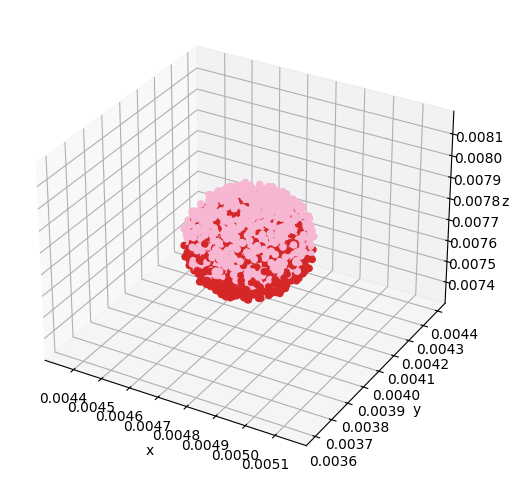

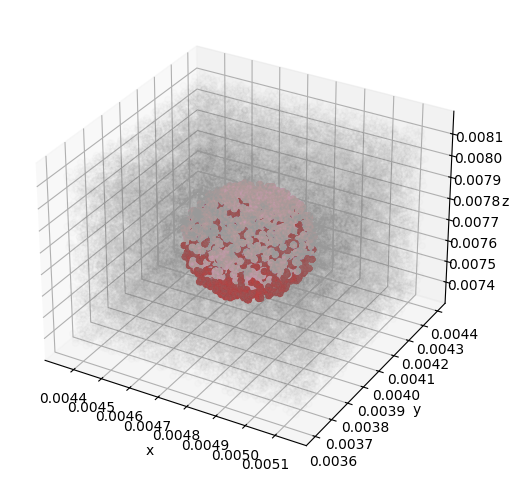

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_twopop_virtual/network-config.json
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons


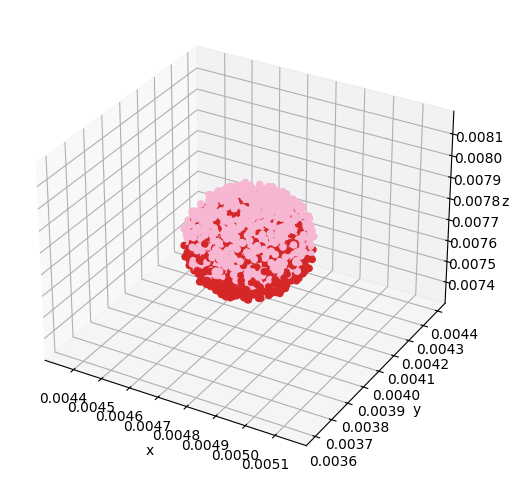

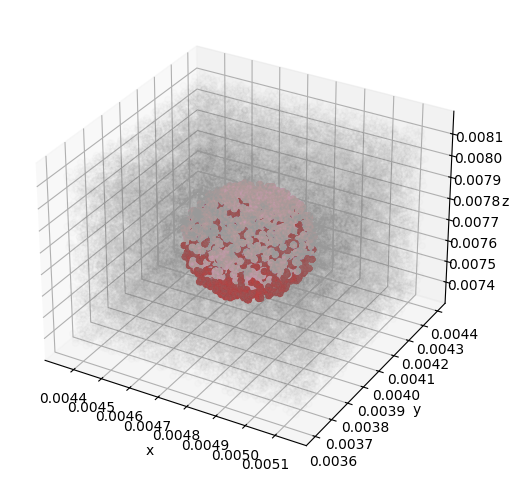

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

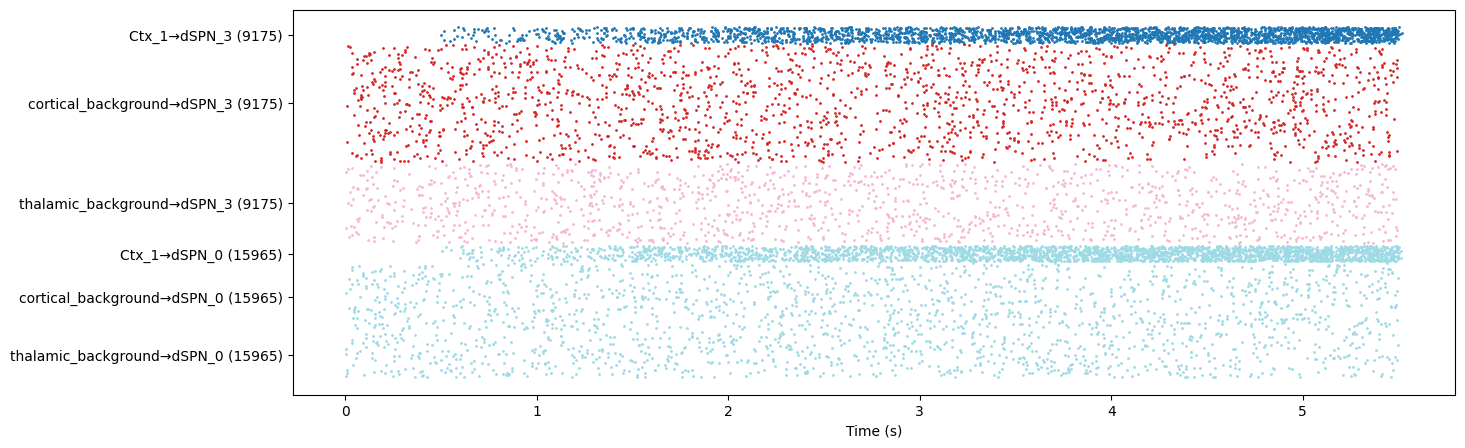

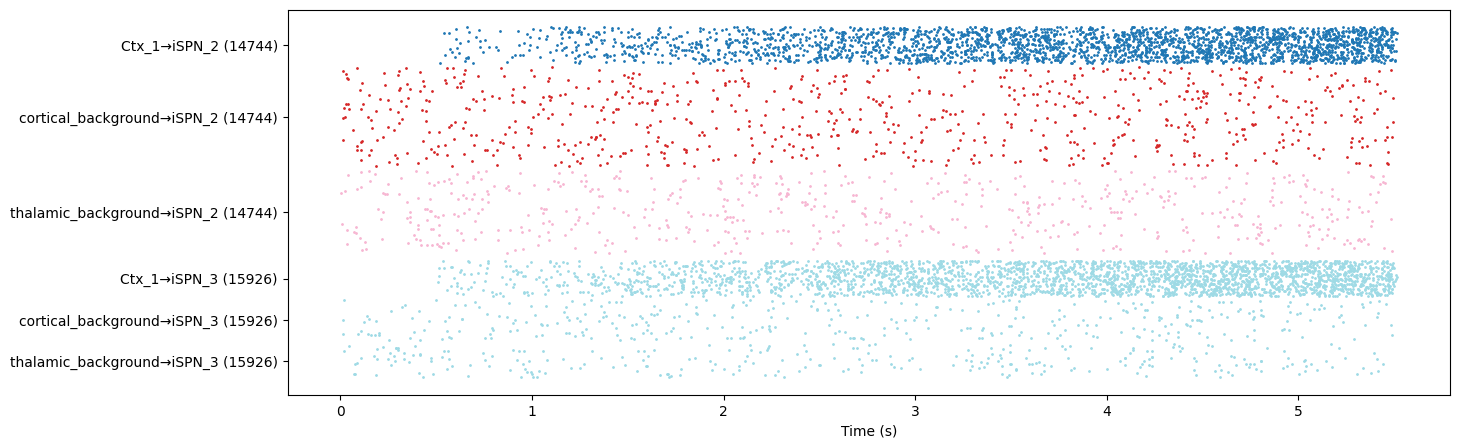

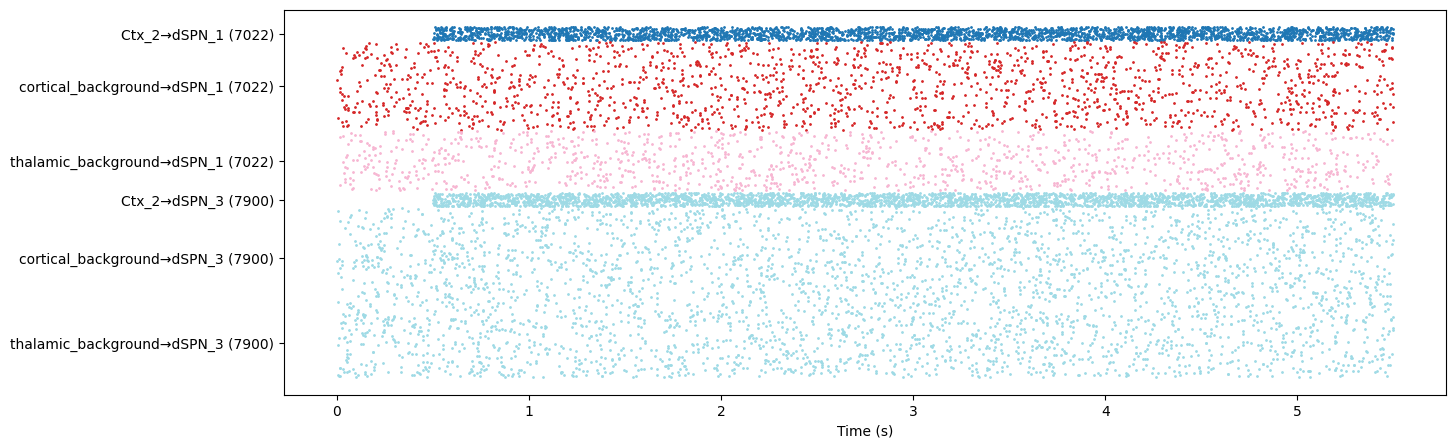

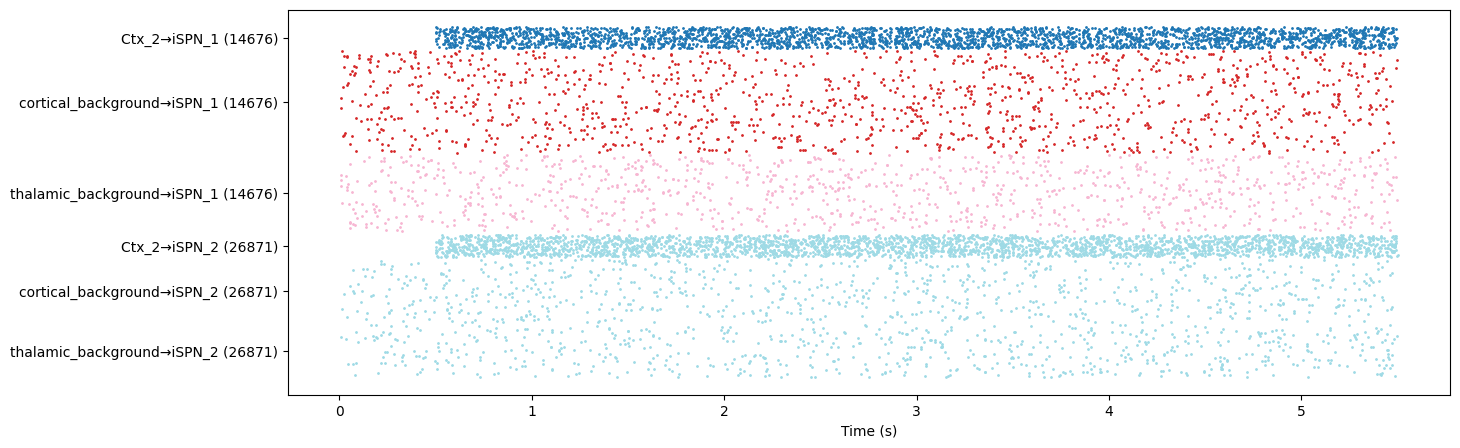

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

Loading ../networks/lateral_twopop_virtual/simulation/output-with-synapses-12Hz-virtual-kim.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2053  2196  2197 ... 30316 30339 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4012: (iSPN_0, p635b801c, m69613ef9)
4022: (iSPN_0, p635b801c, m7bc82287)
4034: (iSPN_0, p635b801c, md0f5647c)
4043: (iSPN_0, p67dac726, mf2f3395e)
4047: (iSPN_0, p635b801c, m6486ed26)
7155: (iSPN_0, p581376d6, mc16840cd)
7322: (iSPN_3, p57956f10, m1083058d)
7938: (iSPN_0, p635b801c, md0f5647c)
7947: (iSPN_0, p581376d6, mc16840cd)
7957: (iSPN_0, pf721cf77, mc16840cd)
7958: (iSPN_0, pf721cf77, m3a845add)
7965: (iSPN_0, pfb05971b, m6486ed26)
7975: (iSPN_0, p581376d6, mc16840cd)
7976: (iSPN_0, p635b801c, mf2f3395e)
9241: (iSPN_0, p581376d6, mf2f3395e)
9257: (iSPN_0, p635b801c, m6486ed26)
9536: (dSPN_2, pb267a31a, mf0350288)
9609: (iSPN_0, p039c9f4f, mf2f3395e)
9614: (iSPN_0, p581376d6, mc16840cd)
9616:

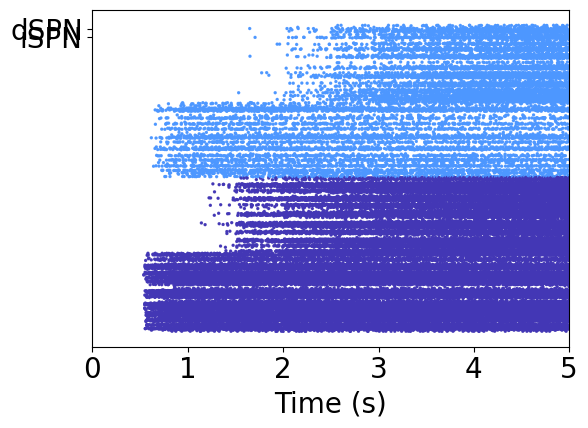

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

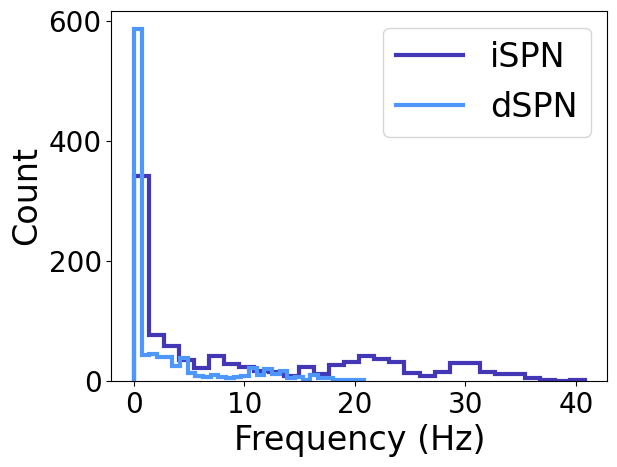

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


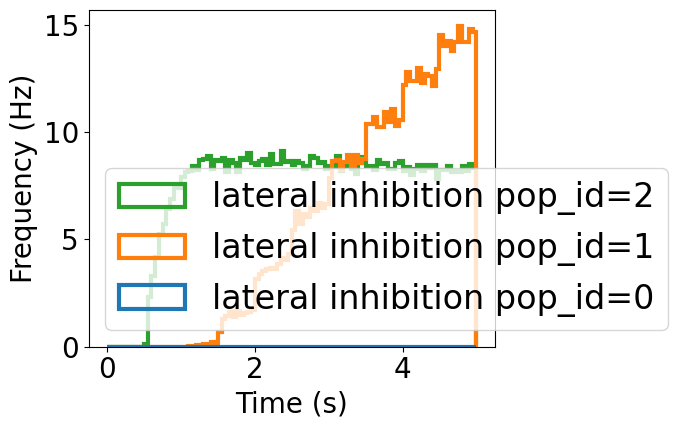

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

Loading ../networks/lateral_twopop_virtual/simulation/output-no-synapses-12Hz-virtual-kim.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2053  2196  2197 ... 30316 30339 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3921: (dSPN_2, pb267a31a, mf0350288)
4018: (iSPN_0, p581376d6, m6486ed26)
4019: (iSPN_0, pf721cf77, m3a845add)
4025: (iSPN_0, p039c9f4f, mf2f3395e)
4031: (iSPN_0, p635b801c, mf2f3395e)
4047: (iSPN_0, p635b801c, m6486ed26)
6797: (iSPN_0, pf721cf77, m6486ed26)
7144: (iSPN_0, p581376d6, mf2f3395e)
7168: (iSPN_0, p635b801c, mf2f3395e)
7184: (iSPN_0, p67dac726, m6486ed26)
7923: (iSPN_0, p581376d6, mf2f3395e)
7924: (iSPN_0, p67dac726, m3a845add)
7925: (iSPN_0, p581376d6, mc16840cd)
7926: (iSPN_0, p581376d6, m3a845add)
7931: (iSPN_0, p635b801c, mc16840cd)
7938: (iSPN_0, p635b801c, md0f5647c)
7941: (iSPN_0, p635b801c, m3a845add)
7947: (iSPN_0, p581376d6, mc16840cd)
7960: (iSPN_0, p581376d6, md0f5647c)
7963: (

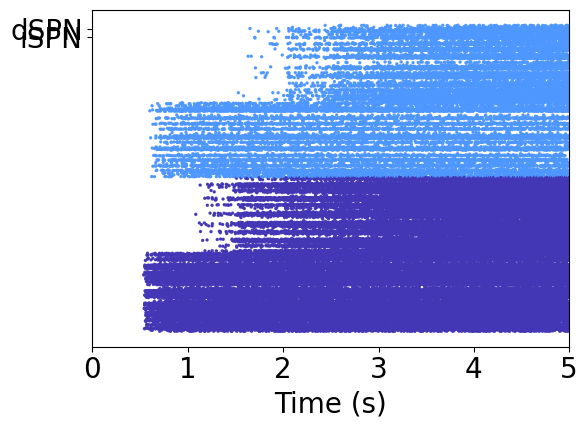

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

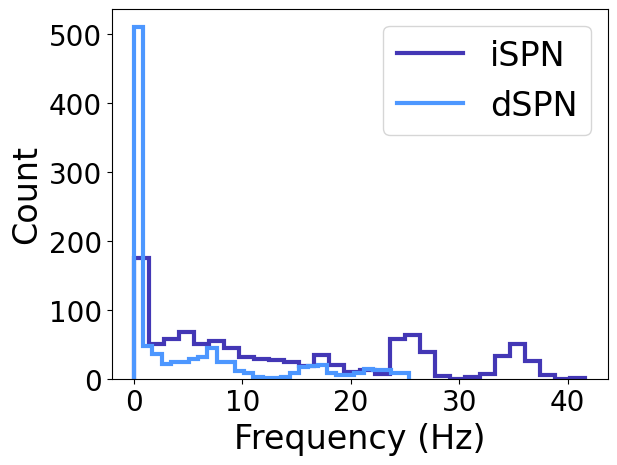

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


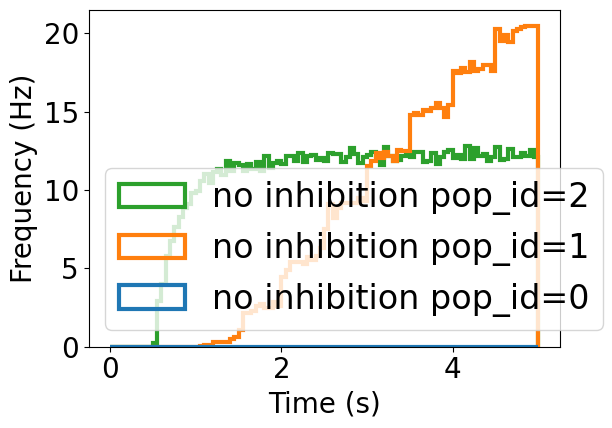

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


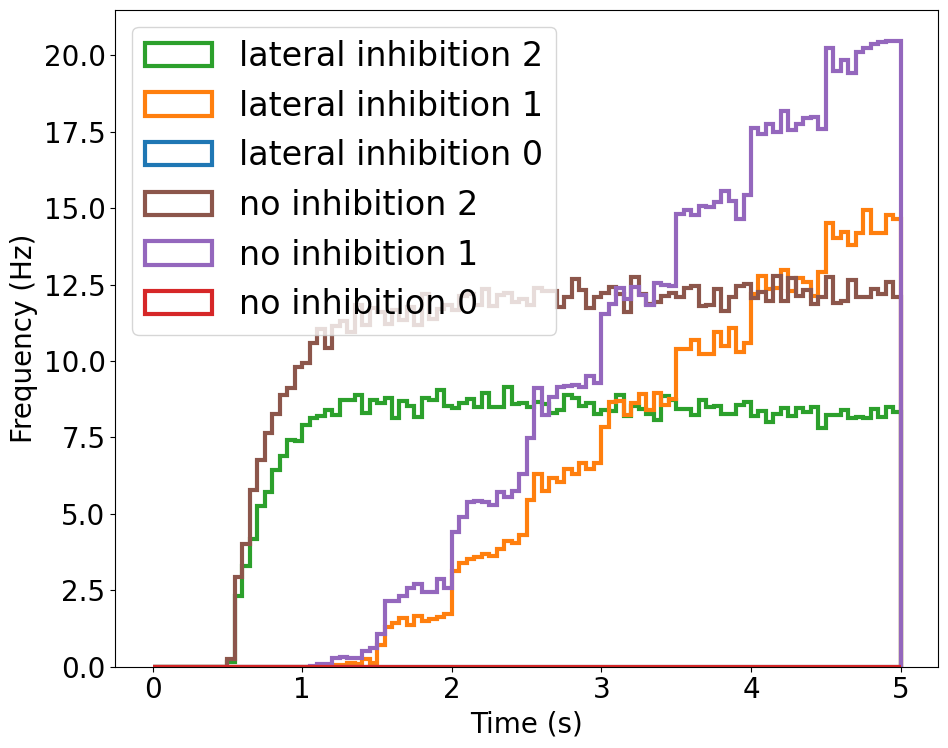

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [14]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/lateral_twopop_virtual/network-synapses-virtual.hdf5
Loading input info from ../networks/lateral_twopop_virtual/input-spikes.hdf5
Loading ../networks/lateral_twopop_virtual/simulation/output-with-synapses-12Hz-virtual-kim.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2053  2196  2197 ... 30316 30339 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4012: (iSPN_0, p635b801c, m69613ef9)
4022: (iSPN_0, p635b801c, m7bc82287)
4034: (iSPN_0, p635b801c, md0f5647c)
4043: (iSPN_0, p67dac726, mf2f3395e)
4047: (iSPN_0, p635b801c, m6486ed26)
7155: (iSPN_0, p581376d6, mc16840cd)
7322: (iSPN_3, p57956f10, m1083058d)
7938: (iSPN_0, p635b801c, md0f5647c)
7947: (iSPN_0, p581376d6, mc16840cd)
7957: (iSPN_0, pf721cf77, mc16840cd)
7958: (iSPN_0, pf721cf77, m3a845add)
7965: (iSPN_0, pfb05971b, m6486ed26)
7975: (iSPN_0, p581376d6, mc16840cd)
7976: (iSPN_0, p635b801c, mf2f3395e)
9241: (iSPN_0, p581376

In [15]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2053 2196 2197 2237 2263 2288 3816 3819 3820 3822 3826 3831 3841 3842
 3845 3846 3848 3850 3853 3854 3855 3856 3857 3861 3862 3863 3864 3866
 3869 3875]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


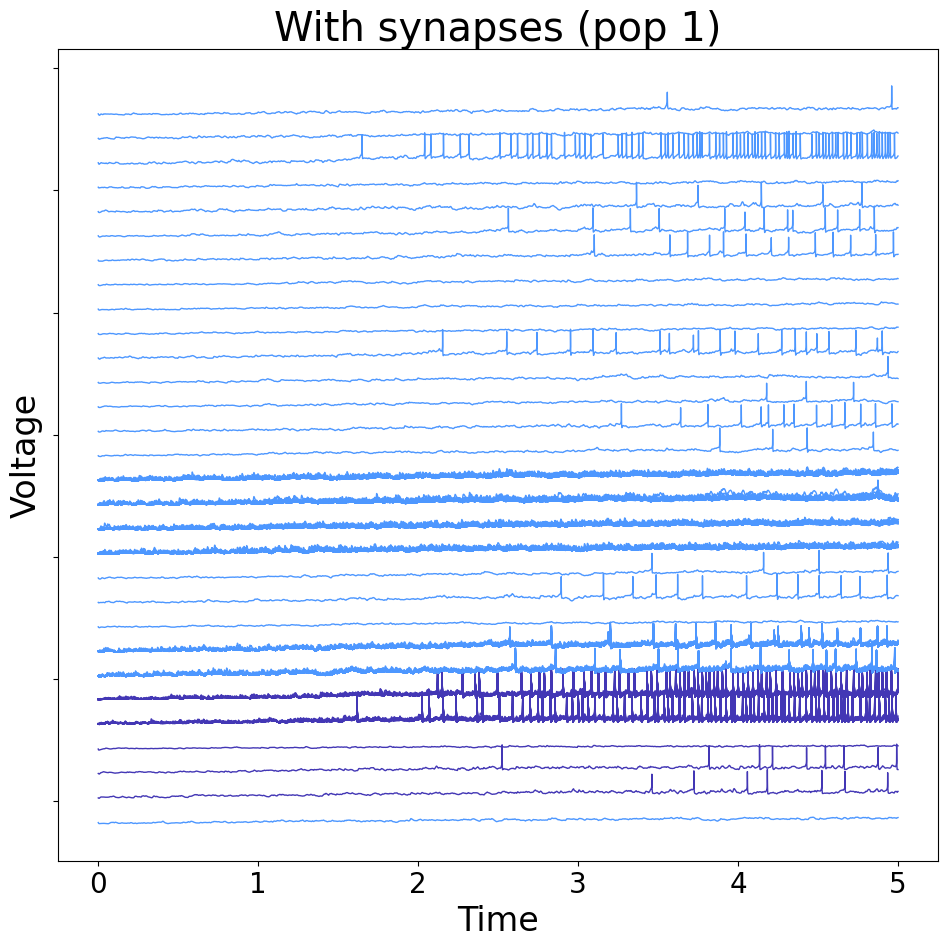

In [16]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [3844 3849 3851 3852 3859 3888 3929 3937 3954 3965 3984 4006 4017 4038
 4043 4044 4063 4064 4088 4118 4122 4147 4148 4192 5115 5355 6797 6966
 6982 6983]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


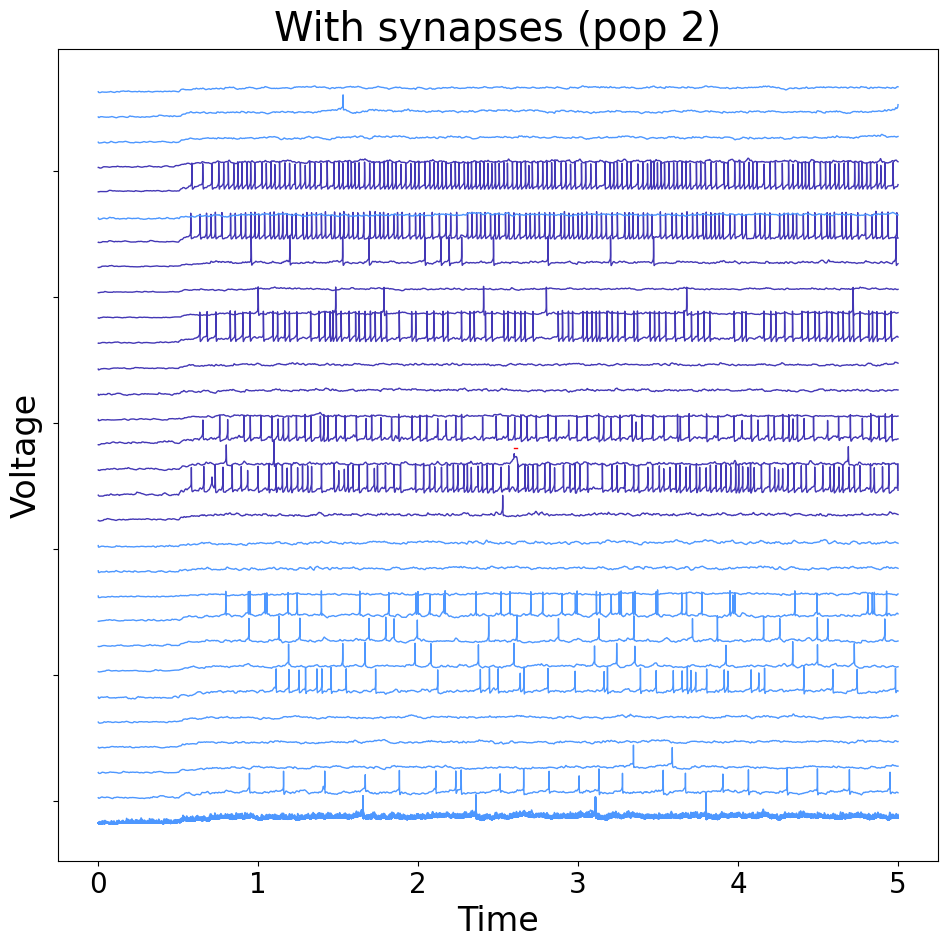

In [17]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [18]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/lateral_twopop_virtual/network-synapses-virtual.hdf5
Loading input info from ../networks/lateral_twopop_virtual/input-spikes.hdf5
Loading ../networks/lateral_twopop_virtual/simulation/output-no-synapses-12Hz-virtual-kim.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2053  2196  2197 ... 30316 30339 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3921: (dSPN_2, pb267a31a, mf0350288)
4018: (iSPN_0, p581376d6, m6486ed26)
4019: (iSPN_0, pf721cf77, m3a845add)
4025: (iSPN_0, p039c9f4f, mf2f3395e)
4031: (iSPN_0, p635b801c, mf2f3395e)
4047: (iSPN_0, p635b801c, m6486ed26)
6797: (iSPN_0, pf721cf77, m6486ed26)
7144: (iSPN_0, p581376d6, mf2f3395e)
7168: (iSPN_0, p635b801c, mf2f3395e)
7184: (iSPN_0, p67dac726, m6486ed26)
7923: (iSPN_0, p581376d6, mf2f3395e)
7924: (iSPN_0, p67dac726, m3a845add)
7925: (iSPN_0, p581376d6, mc16840cd)
7926: (iSPN_0, p581376d6, m3a845add)
7931: (iSPN_0, p635b801c

In [19]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2053 2196 2197 2237 2263 2288 3816 3819 3820 3822 3826 3831 3841 3842
 3845 3846 3848 3850 3853 3854 3855 3856 3857 3861 3862 3863 3864 3866
 3869 3875]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


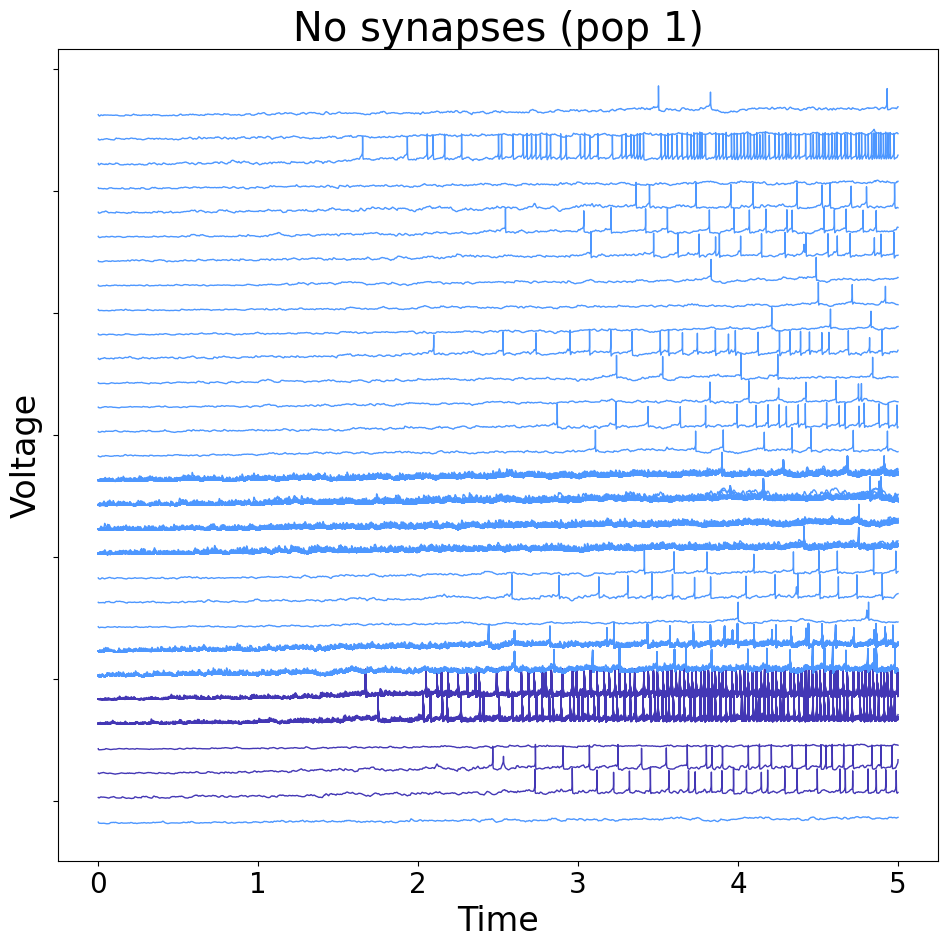

In [20]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [3844 3849 3851 3852 3859 3888 3929 3937 3954 3965 3984 4006 4017 4038
 4043 4044 4063 4064 4088 4118 4122 4147 4148 4192 5115 5355 6797 6966
 6982 6983]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


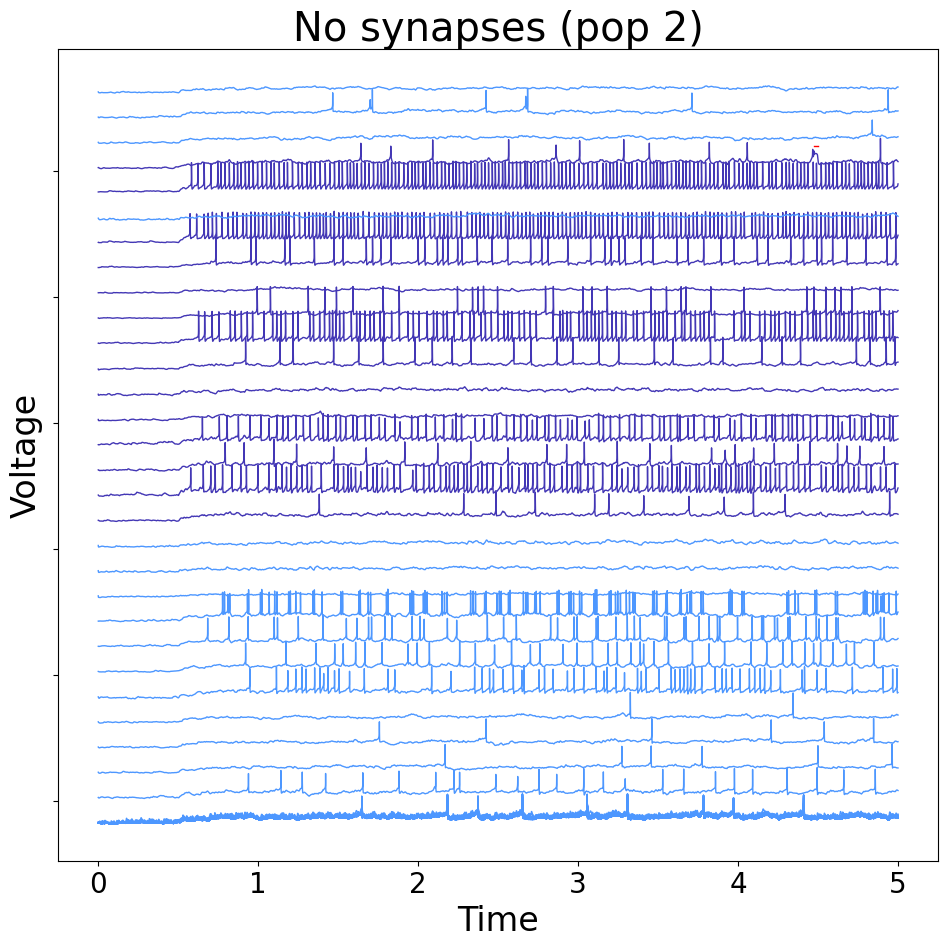

In [21]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [22]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 4012  4022  4034  4047  7155  7322  7957  7958  9536  9609  9614  9616
 10612 10713 10721 10842 10847 10870 14443 14600 14602 15780 15791 21285
 24633]
Plotted 25 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


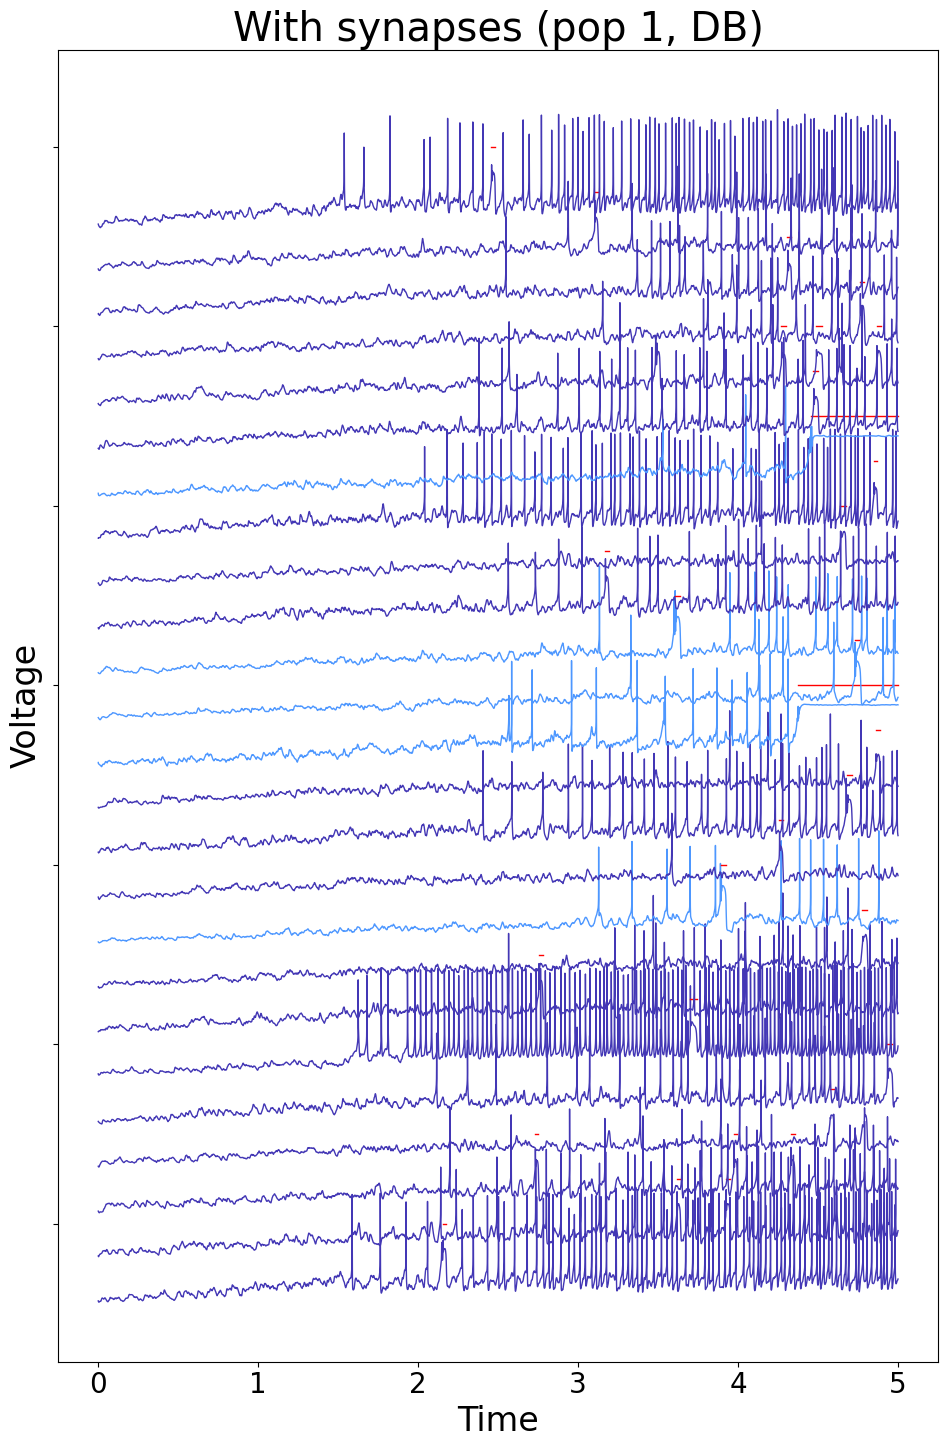

In [23]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 4043  7938  7947  7965  7975  7976  9241  9257  9618  9625 10855 14628
 14634 14650 15379 15557 15753 15761 15773 15777 16158 16324 16556 16563
 16573 21241 21271 24630 24652 26771 27498 30223]
Plotted 32 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


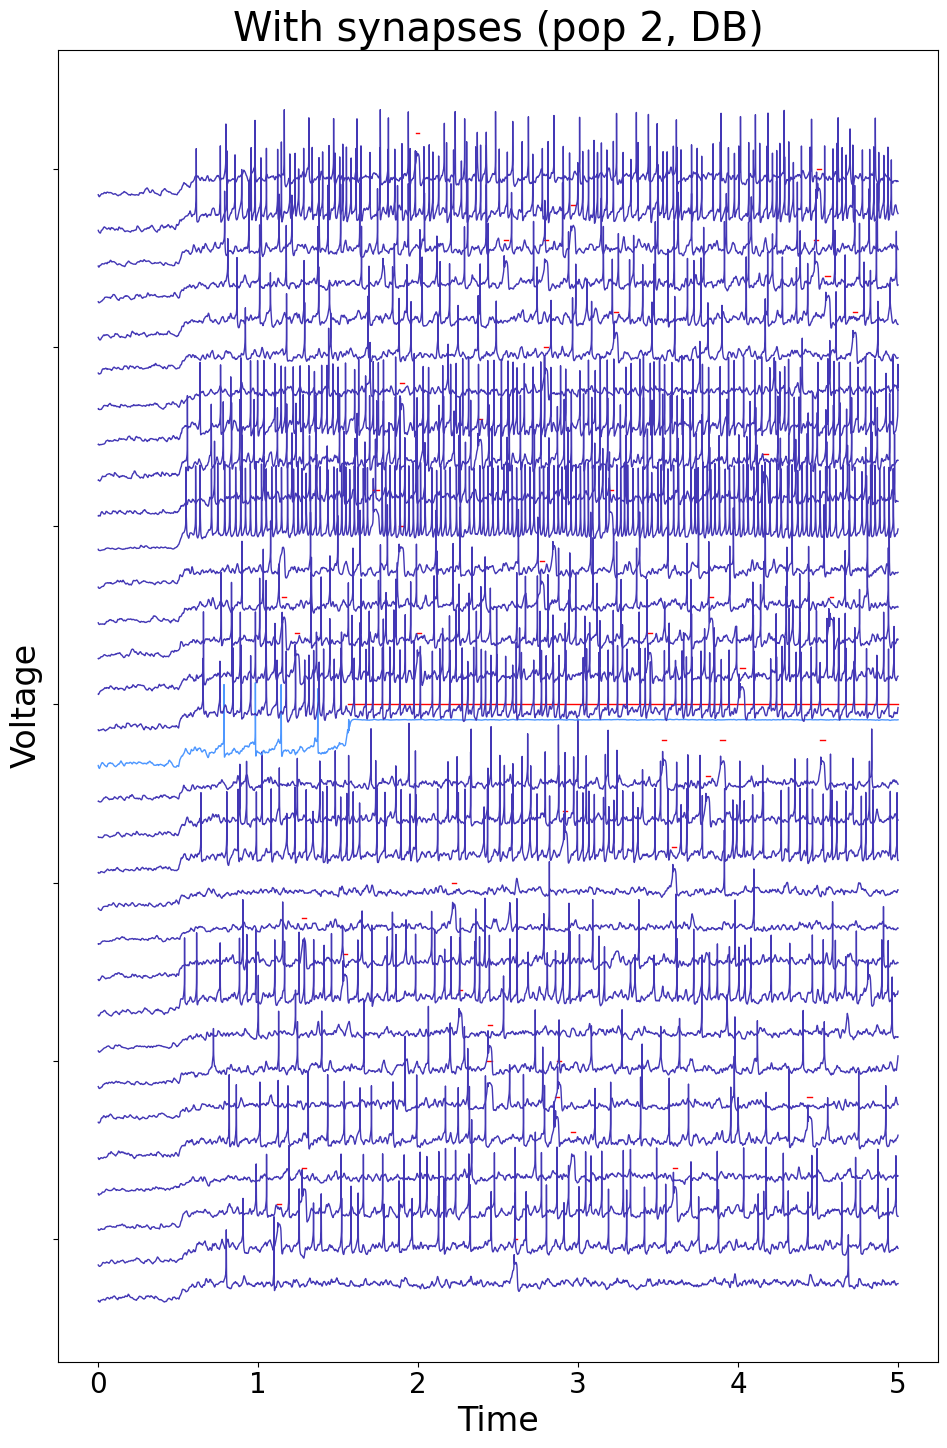

In [24]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 3921  4018  4019  4025  4031  4047  7144  7168  7184  7960  8096  9215
  9240  9242  9261  9445  9530  9539  9611  9616  9647  9648 10617 10859
 10872 15559 15758 15759 15774 15780 15789 16137 21121 21266]
Plotted 34 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


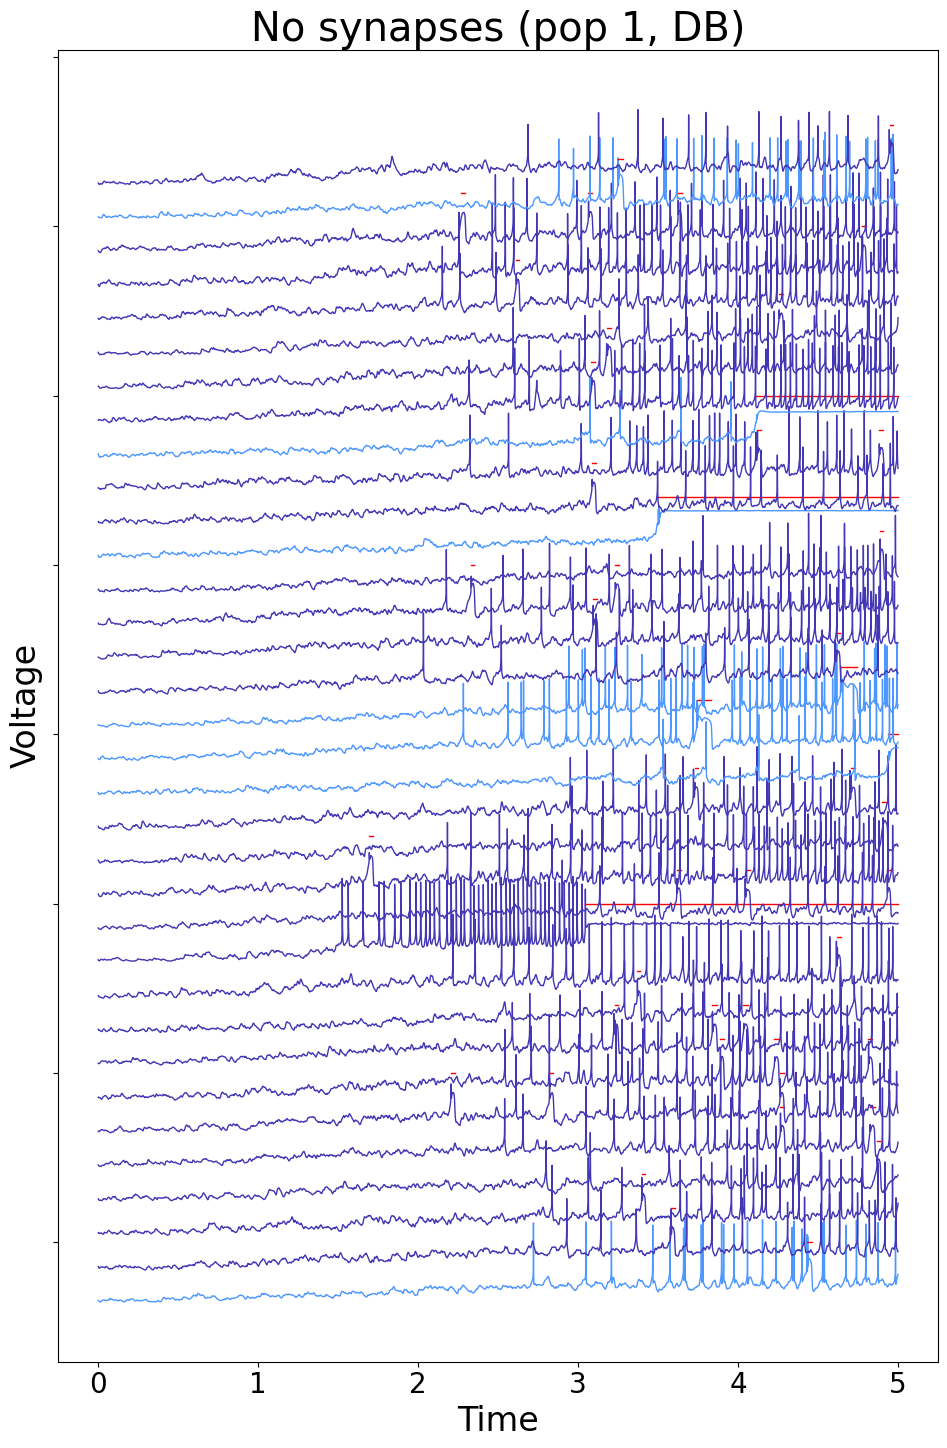

In [25]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 6797  7923  7924  7925  7926  7931  7938  7941  7947  7963  7966  7975
  9050  9232  9235  9257  9617  9625  9626  9635 10835 10855 14513 14597
 14625 14627 14628 14641 15569 15649 15651 15678 15761 15762 15769 15773
 15777 15790 16135 16158 16324 16372 16563 16568 16714 19111 21271 24630
 24652 24658 26753 27472]
Plotted 52 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-dSPN.pdf


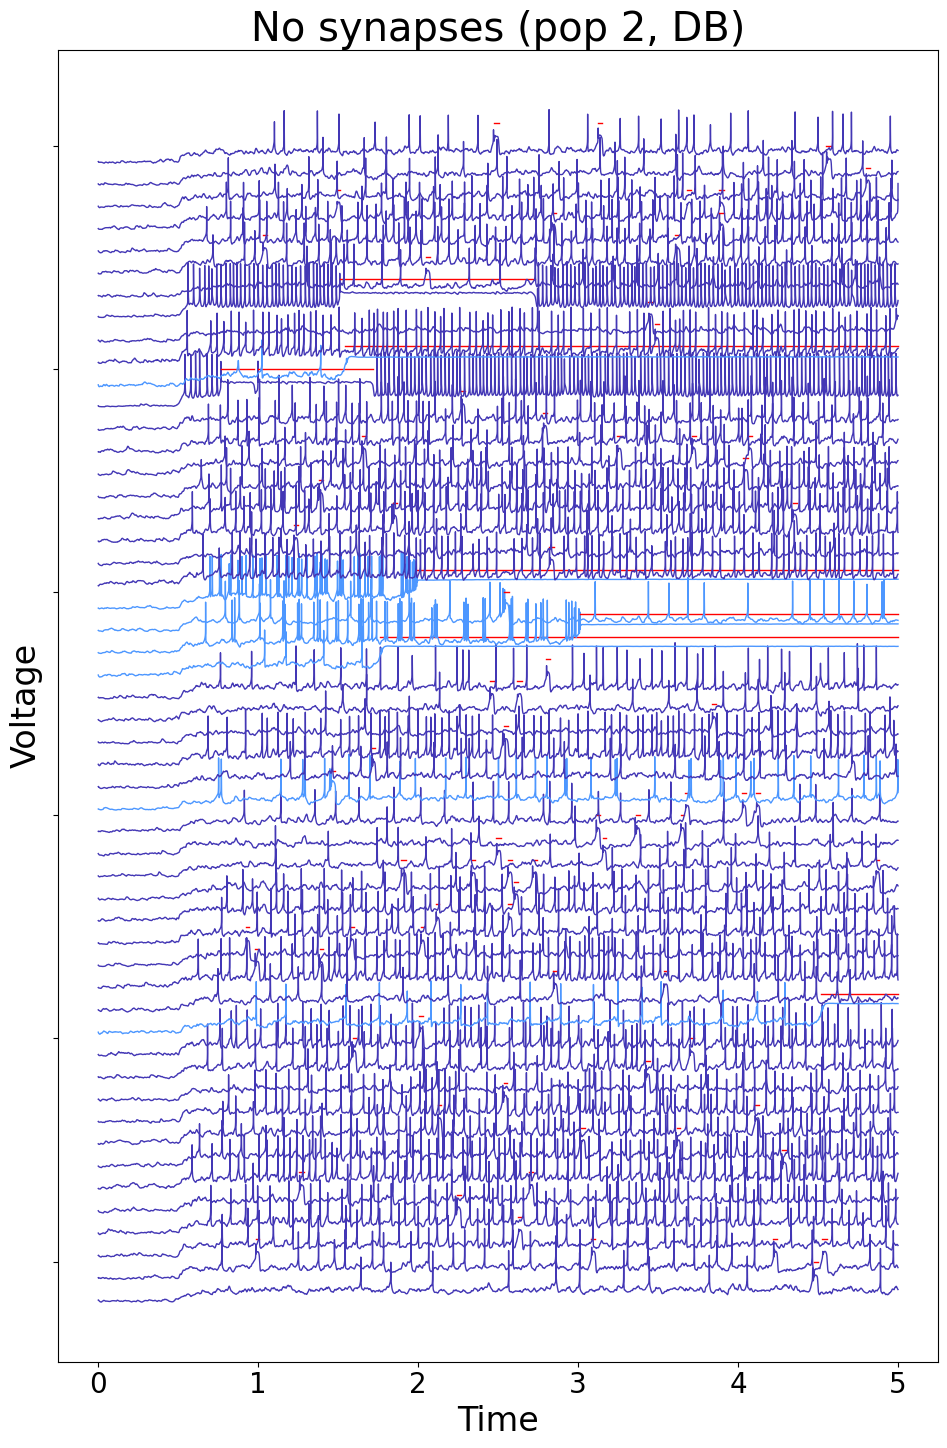

In [26]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)